In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [3]:
data = pd.read_csv('Loan_default.csv')

In [4]:
data.head()

,disbursed_amount,ltv,Age,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loss
0,64769,89.23,36,Salaried,6,1,0,0,0,786,3,2,0,25,27,1,0,0.0
1,49478,89.46,36,Salaried,6,1,0,0,0,738,10,5,0,12,25,4,1,0.0
2,70017,82.99,32,Self employed,6,0,0,1,0,585,1,0,0,21,21,0,1,1.0
3,31184,56.91,37,Salaried,6,1,0,0,0,801,7,5,0,33,70,2,0,0.0
4,54513,89.66,51,Self employed,6,1,0,0,0,730,5,3,0,24,64,0,0,0.0


In [5]:
data.isnull().sum()

disbursed_amount                         0
ltv                                      0
Age                                      0
Employment.Type                        770
State_ID                                 0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
PERFORM_CNS.SCORE                        0
PRI.NO.OF.ACCTS                          0
PRI.ACTIVE.ACCTS                         0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
AVERAGE.ACCT.AGE                         0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
loan_default                             0
Loss                                     0
dtype: int64

In [6]:
data_1 = data.dropna()

In [7]:
data_1.head()

,disbursed_amount,ltv,Age,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loss
0,64769,89.23,36,Salaried,6,1,0,0,0,786,3,2,0,25,27,1,0,0.0
1,49478,89.46,36,Salaried,6,1,0,0,0,738,10,5,0,12,25,4,1,0.0
2,70017,82.99,32,Self employed,6,0,0,1,0,585,1,0,0,21,21,0,1,1.0
3,31184,56.91,37,Salaried,6,1,0,0,0,801,7,5,0,33,70,2,0,0.0
4,54513,89.66,51,Self employed,6,1,0,0,0,730,5,3,0,24,64,0,0,0.0


In [8]:
data_1.isnull().sum()

disbursed_amount                       0
ltv                                    0
Age                                    0
Employment.Type                        0
State_ID                               0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
PERFORM_CNS.SCORE                      0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
AVERAGE.ACCT.AGE                       0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
loan_default                           0
Loss                                   0
dtype: int64

In [9]:
replacements = {k: i for i, k in enumerate(data_1["Employment.Type"].unique(),0)}
print(replacements)

{'Salaried': 0, 'Self employed': 1}


In [10]:
data_1 = data_1.replace(replacements)

In [11]:
data_1

,disbursed_amount,ltv,Age,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loss
0,64769,89.23,36,0,6,1,0,0,0,786,3,2,0,25,27,1,0,0.0
1,49478,89.46,36,0,6,1,0,0,0,738,10,5,0,12,25,4,1,0.0
2,70017,82.99,32,1,6,0,0,1,0,585,1,0,0,21,21,0,1,1.0
3,31184,56.91,37,0,6,1,0,0,0,801,7,5,0,33,70,2,0,0.0
4,54513,89.66,51,1,6,1,0,0,0,730,5,3,0,24,64,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,29029,43.52,26,1,15,1,0,0,0,730,5,2,0,5,9,0,0,0.0
23360,53303,77.86,40,0,6,0,0,1,0,767,7,3,0,82,149,0,0,0.0
23361,50155,85.00,48,0,6,0,0,1,0,783,2,2,0,54,54,0,0,0.0
23362,43210,72.93,47,1,6,1,0,0,0,553,13,6,1,15,28,0,0,0.0


In [12]:
data_1.describe()

,disbursed_amount,ltv,Age,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Loss
count,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000,22594.000000
mean,54310.320351,74.808424,36.821546,0.571745,7.260025,0.836682,0.073781,0.148491,0.024785,292.035939,2.416394,1.041870,0.097282,8.990750,16.390236,0.204479,0.218332,0.163253
std,12575.198636,11.496203,9.682327,0.494837,4.508044,0.369663,0.261419,0.355594,0.155474,338.640931,4.830269,1.886718,0.376004,15.122268,28.647353,0.697109,0.413123,0.361565
min,13990.000000,17.050000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,69.000000,29.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,77.020000,35.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60274.750000,83.820000,44.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,680.000000,3.000000,1.000000,0.000000,13.000000,24.000000,0.000000,0.000000,0.000000
max,315904.000000,95.000000,66.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,879.000000,131.000000,42.000000,9.000000,184.000000,468.000000,19.000000,1.000000,1.051200


In [13]:
data_2 = data_1["loan_default"]

In [14]:
unique, frequency = np.unique(data_2, 
                              return_counts = True)

In [15]:
unique

array([0, 1], dtype=int64)

In [16]:
frequency

array([17661,  4933], dtype=int64)

In [17]:
data_3 = data_1["Employment.Type"]

In [18]:
unique, frequency = np.unique(data_3, 
                              return_counts = True)

In [19]:
unique

array([0, 1], dtype=int64)

In [20]:
frequency

array([ 9676, 12918], dtype=int64)

In [21]:
data_4 = data_1.drop(['State_ID','VoterID_flag','PAN_flag','Aadhar_flag','Driving_flag','PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE','NO.OF_INQUIRIES'],axis=1)

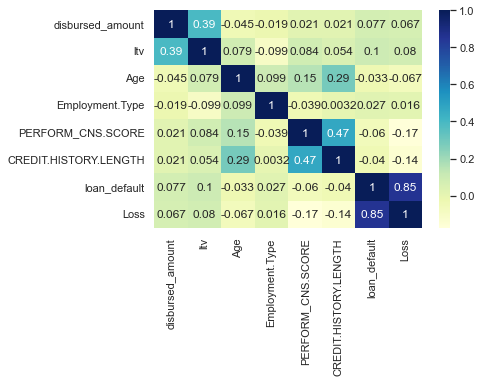

In [22]:
sns.heatmap(data_4.corr(), annot = True, cmap="YlGnBu")
plt.show()

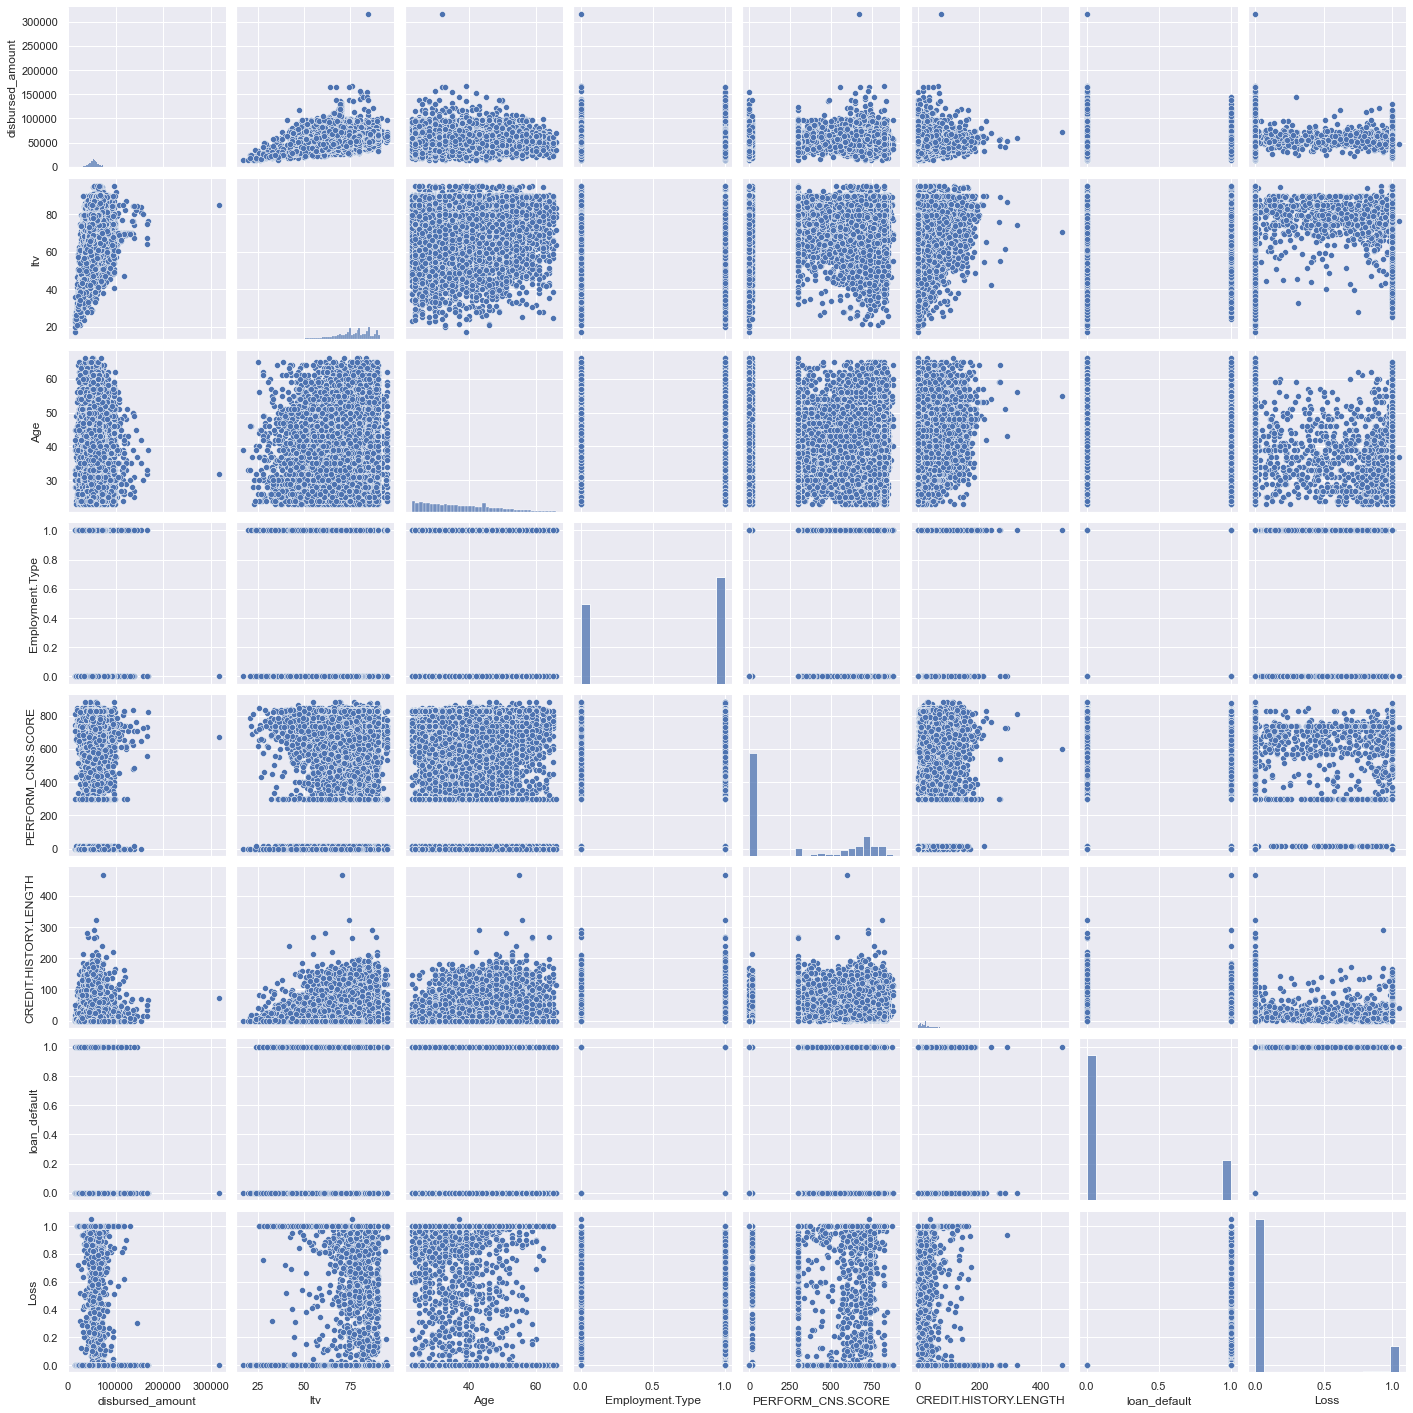

In [23]:
sns.pairplot(data_4)
plt.show()

In [24]:
a = data_4[(data_4['Employment.Type']==1) & (data_4['loan_default']==1)]
print(a)    

       disbursed_amount    ltv  Age  Employment.Type  PERFORM_CNS.SCORE  \
2                 70017  82.99   32                1                585   
7                 61013  89.76   34                1                701   
24                53878  79.88   33                1                  0   
45                44145  75.86   29                1                832   
58                53803  88.66   49                1                  0   
...                 ...    ...  ...              ...                ...   
23319             55959  74.27   27                1                 17   
23336             62734  79.49   38                1                300   
23337             60581  76.80   35                1                437   
23341             47349  77.91   27                1                  0   
23345             52907  80.00   33                1                  0   

       CREDIT.HISTORY.LENGTH  loan_default  Loss  
2                         21             1   1.0

In [25]:
b = data_4[(data_4['Employment.Type']==0) & (data_4['loan_default']==1)]
print(b)

       disbursed_amount    ltv  Age  Employment.Type  PERFORM_CNS.SCORE  \
1                 49478  89.46   36                0                738   
8                 53040  82.73   36                0                  0   
14                44575  78.94   31                0                  0   
15                41670  74.18   42                0                656   
36                53192  85.00   26                0                625   
...                 ...    ...  ...              ...                ...   
23316             66185  90.00   43                0                  0   
23318             64390  78.47   45                0                763   
23329             72823  63.57   28                0                300   
23342             33284  56.46   35                0                  0   
23357             57513  78.92   37                0                537   

       CREDIT.HISTORY.LENGTH  loan_default    Loss  
1                         25             1  0.